In [49]:
# Do players from certain countries (winner_ioc, loser_ioc) excel on specific surfaces?
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
df = pd.read_csv("/Users/benediktas/dev/University/data-science/tennis/tennis_atp/tennis_atpatp_matches_combined.csv")
# df.columns

df_clean = df.dropna(subset=["winner_ioc", "loser_ioc","surface"])

use_col = [
    "tourney_id", "tourney_name", "surface", "winner_id", "winner_name", "winner_rank", "loser_id", "loser_name", "winner_ioc", "loser_ioc"
]

df_country = df_clean[use_col].copy()

In [51]:
df_country["surface"].unique()

array(['Hard', 'Clay', 'Carpet', 'Grass'], dtype=object)

In [52]:
surfaces = ["Hard", "Clay", "Grass"]

In [53]:
wins = (
    df_country.groupby(["winner_ioc", "surface"])
        .size()
        .rename("wins")
        .reset_index()
)

wins

,winner_ioc,surface,wins
0,AHO,Clay,3
1,AHO,Hard,26
2,ALG,Clay,36
3,ALG,Hard,10
4,AND,Carpet,3
...,...,...,...
385,ZAM,Hard,1
386,ZIM,Carpet,55
387,ZIM,Clay,29
388,ZIM,Grass,68


In [54]:
played_w = df_country.groupby(["winner_ioc", "surface"]).size().rename("as_winner")
played_l = df_country.groupby(["loser_ioc", "surface"]).size().rename("as_loser")
played = (
    pd.concat([played_w, played_l], axis=1)
      .fillna(0)
      .sum(axis=1)
      .rename("matches")
      .reset_index()
)

In [55]:
played = played.rename(columns={"winner_ioc": "ioc"})  # index name from concat
wins2 = wins.rename(columns={"winner_ioc": "ioc"})

In [56]:
played_w.index.set_names(["ioc","surface"], inplace=True)
played_l.index.set_names(["ioc","surface"], inplace=True)
played = (
    pd.concat([played_w, played_l], axis=1)
      .fillna(0)
      .sum(axis=1)
      .rename("matches")
      .reset_index()
)

In [57]:
played = played.rename(columns={"winner_ioc": "ioc"})  # index name from concat
wins2 = wins.rename(columns={"winner_ioc": "ioc"})

In [58]:
country_surface = (
    wins2.merge(played, on=["ioc", "surface"], how="right")
         .fillna({"wins": 0})
)
country_surface["win_rate"] = country_surface["wins"] / country_surface["matches"]

country_surface

,ioc,surface,wins,matches,win_rate
0,AHO,Clay,3.0,28.0,0.107143
1,AHO,Hard,26.0,48.0,0.541667
2,ALG,Clay,36.0,93.0,0.387097
3,ALG,Hard,10.0,28.0,0.357143
4,AND,Carpet,3.0,8.0,0.375000
...,...,...,...,...,...
430,UAE,Hard,0.0,11.0,0.000000
431,VAN,Clay,0.0,1.0,0.000000
432,VAN,Hard,0.0,9.0,0.000000
433,VIE,Carpet,0.0,1.0,0.000000


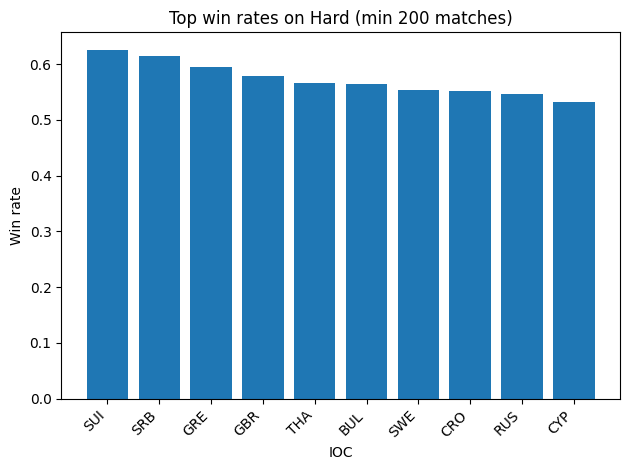

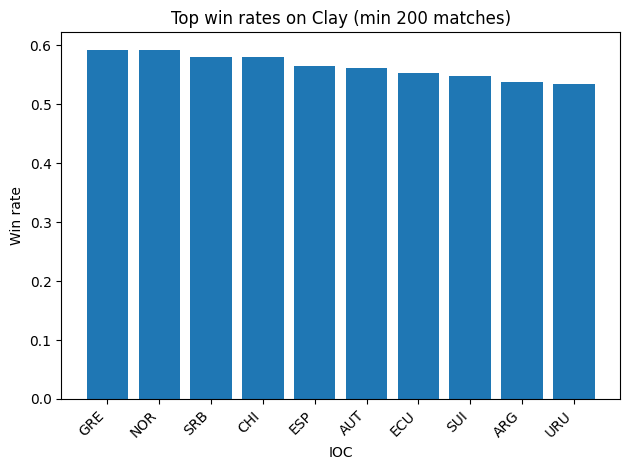

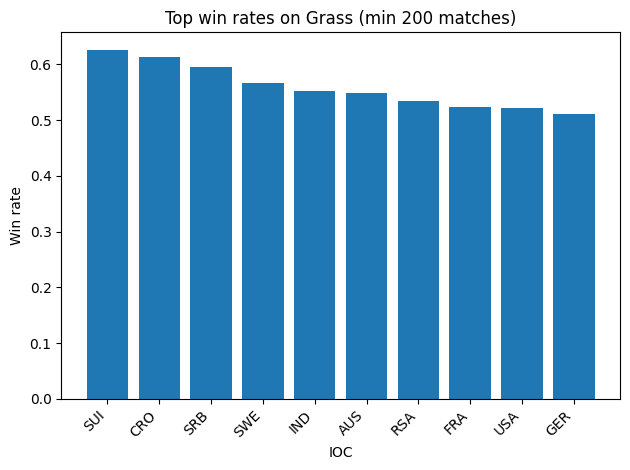

In [59]:
min_matches = 200
cs = country_surface[country_surface["matches"] >= min_matches].copy()

for surf in ["Hard", "Clay", "Grass"]:
    top = (
        cs[cs["surface"] == surf]
        .sort_values("win_rate", ascending=False)
        .head(10)
    )
    plt.figure()
    plt.bar(top["ioc"], top["win_rate"])
    plt.title(f"Top win rates on {surf} (min {min_matches} matches)")
    plt.ylabel("Win rate")
    plt.xlabel("IOC")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

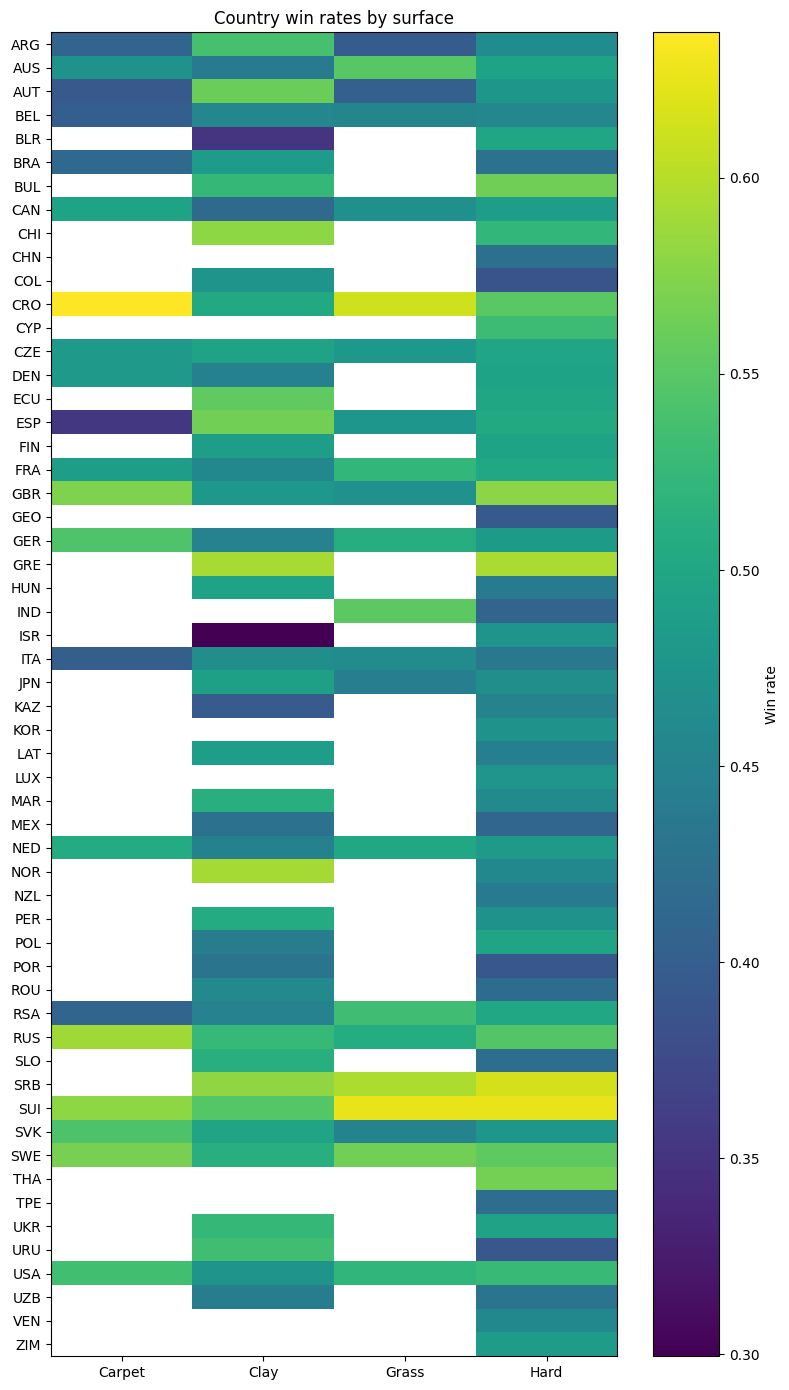

In [60]:
import numpy as np

pivot = cs.pivot(index="ioc", columns="surface", values="win_rate")
totals = country_surface.groupby("ioc")["matches"].sum()
pivot = pivot.loc[totals[totals >= 500].index] #treshhold 

plt.figure(figsize=(8, max(6, 0.25*len(pivot))))
plt.imshow(pivot.values, aspect="auto")
plt.colorbar(label="Win rate")
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.title("Country win rates by surface")
plt.tight_layout()
plt.show()
